In [1]:
import itertools
import operator

import numpy as np
from astropy import units as u
from magicctapipe.io import load_mc_dl2_data_file
from matplotlib import gridspec
from matplotlib import pyplot as plt
from pyirf.benchmarks import angular_resolution, energy_bias_resolution
from pyirf.cuts import calculate_percentile_cut, evaluate_binned_cut
from pyirf.irf import effective_area_per_energy

In [2]:
# Configure the pyplot figure
plt.rcParams.update(
    {"figure.figsize": (12, 9), "font.size": 15, "grid.linestyle": "dotted"}
)

# Get the pyplot default color cycle
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Load MAGIC DL2 data

In [3]:
# ================
# === Settings ===
# ================

input_file = (
    "/home/yoshiki.ohtani/lstmagic/mc/zd40deg_az90deg/magic_only_analysis/4.dl1_stereo_to_dl2/"
    "data/gamma/dl2/merged/dl2_magic_only_gamma_zd_40.0deg_az_90.0deg_LST-1_MAGIC_run401_to_1000.h5"
)

quality_cuts = f"(disp_diff_mean < {np.sqrt(0.05)})"

# # ============
# # === Main ===
# # ============

print(f"Input file: {input_file}")
print(f"\nQuality cuts: {quality_cuts}")

# Load the input file
data_magic, _, sim_info_magic = load_mc_dl2_data_file(
    input_file, quality_cuts, event_type="magic_only", weight_type_dl2="simple"
)

# Show the data table
data_magic[:5]

Input file: /home/yoshiki.ohtani/lstmagic/mc/zd40deg_az90deg/magic_only_analysis/4.dl1_stereo_to_dl2/data/gamma/dl2/merged/dl2_magic_only_gamma_zd_40.0deg_az_90.0deg_LST-1_MAGIC_run401_to_1000.h5

Quality cuts: (disp_diff_mean < 0.22360679774997896)



In total 477199 stereo events are found:
    M1_M2 (type 0): 477199 events (100.0%)
    LST1_M1 (type 1): 0 events (0.0%)
    LST1_M2 (type 2): 0 events (0.0%)
    LST1_M1_M2 (type 3): 0 events (0.0%) 

Extracting the events of the 'magic_only' type...
--> 477199 stereo events


obs_id,event_id,combo_type,multiplicity,true_energy,true_alt,true_az,pointing_alt,pointing_az,reco_energy,reco_alt,reco_az,gammaness,theta,true_source_fov_offset,reco_source_fov_offset
,,,,TeV,deg,deg,rad,rad,TeV,deg,deg,,deg,deg,deg
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
401,13605,0,2,0.6236247420310974,50.0000002530119,89.999995674289,0.8656833474915151,1.5707963705062864,0.4744231109606334,50.041107128533184,89.94039159450904,0.9444166666666667,0.05618173805480561,0.3999980470153132,0.4427783699442063
401,13606,0,2,0.6236247420310974,50.0000002530119,89.999995674289,0.8656833474915151,1.5707963705062864,0.47912279374902145,50.04249329803637,89.98580191417803,0.9217142857142857,0.043460612903663334,0.3999980470153132,0.4425859283445896
401,13609,0,2,0.6236247420310974,50.0000002530119,89.999995674289,0.8656833474915151,1.5707963705062864,0.5101104743940791,49.978012862994944,90.00819949231237,0.9770833333333333,0.022611188849645893,0.3999980470153132,0.3780476975549167
401,15600,0,2,0.21664372086524963,50.0000002530119,89.999995674289,0.8656833474915151,1.5707963705062864,0.22541553850117652,49.753345074962205,89.98526109221594,0.9119166666666667,0.2468378825881244,0.3999980470153132,0.1536392884692065
401,20201,0,2,0.5037534236907959,50.0000002530119,89.999995674289,0.8656833474915151,1.5707963705062864,0.48534478334401276,50.06186371462703,90.09448415336732,0.97875,0.08666720138167297,0.3999980470153132,0.4658650375745834


# Load LST-1 + MAGIC DL2 data

In [4]:
# ================
# === Settings ===
# ================

input_file = (
    "/home/yoshiki.ohtani/lstmagic/mc/zd40deg_az90deg/4.dl1_stereo_to_dl2/"
    "data/gamma/dl2/merged/dl2_gamma_zd_40.000deg_az_90.000deg_LST-1_MAGIC_run401_to_1000.h5"
)

quality_cuts = f"(disp_diff_mean < {np.sqrt(0.05)})"

# # ============
# # === Main ===
# # ============

print(f"Input file: {input_file}")
print(f"\nQuality cuts: {quality_cuts}")

# Load the input file
data_mlst, _, sim_info_mlst = load_mc_dl2_data_file(
    input_file, quality_cuts, event_type="software_only_3tel", weight_type_dl2="simple"
)

# Show the data table
data_mlst[:5]

Input file: /home/yoshiki.ohtani/lstmagic/mc/zd40deg_az90deg/4.dl1_stereo_to_dl2/data/gamma/dl2/merged/dl2_gamma_zd_40.000deg_az_90.000deg_LST-1_MAGIC_run401_to_1000.h5

Quality cuts: (disp_diff_mean < 0.22360679774997896)



In total 819920 stereo events are found:
    M1_M2 (type 0): 2584 events (0.3%)
    LST1_M1 (type 1): 100260 events (12.2%)
    LST1_M2 (type 2): 215473 events (26.3%)
    LST1_M1_M2 (type 3): 501603 events (61.2%) 

Extracting the events of the 'software_only_3tel' type...
--> 501603 stereo events


obs_id,event_id,combo_type,multiplicity,true_energy,true_alt,true_az,pointing_alt,pointing_az,reco_energy,reco_alt,reco_az,gammaness,theta,true_source_fov_offset,reco_source_fov_offset
,,,,TeV,deg,deg,rad,rad,TeV,deg,deg,,deg,deg,deg
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
401,13605,3,3,0.6236247420310974,50.0000002530119,89.999995674289,0.8656833474915151,1.5707963705062864,0.4867230619028499,50.052341501472995,89.96092692968126,0.9592301587301587,0.058048061920365435,0.3999980470153132,0.4530411283618238
401,13606,3,3,0.6236247420310974,50.0000002530119,89.999995674289,0.8656833474915151,1.5707963705062864,0.5003936670586511,50.03704362705393,89.99534472549097,0.9359444444444445,0.03716372175891545,0.3999980470153132,0.43705175321925366
401,13609,3,3,0.6236247420310974,50.0000002530119,89.999995674289,0.8656833474915151,1.5707963705062864,0.5225974143898492,49.957179451478034,90.04821660657399,0.9334444444444444,0.05286981416019104,0.3999980470153132,0.3585315737421014
401,15600,3,3,0.21664372086524963,50.0000002530119,89.999995674289,0.8656833474915151,1.5707963705062864,0.21363460192782388,49.768105900796336,90.02640341777801,0.9062857142857143,0.23251777318132164,0.3999980470153132,0.1689693073987903
401,15607,3,3,0.21664372086524963,50.0000002530119,89.999995674289,0.8656833474915151,1.5707963705062864,0.32356818529378223,49.96281007205141,90.07961878328022,0.9887222222222222,0.06328194197933638,0.3999980470153132,0.3664319213473893


# Check the reconstructed energy

Energy bins in TeV:
[6.30957344e-02 1.00000000e-01 1.58489319e-01 2.51188643e-01
 3.98107171e-01 6.30957344e-01 1.00000000e+00 1.58489319e+00
 2.51188643e+00 3.98107171e+00 6.30957344e+00 1.00000000e+01
 1.58489319e+01 2.51188643e+01 3.98107171e+01 6.30957344e+01]


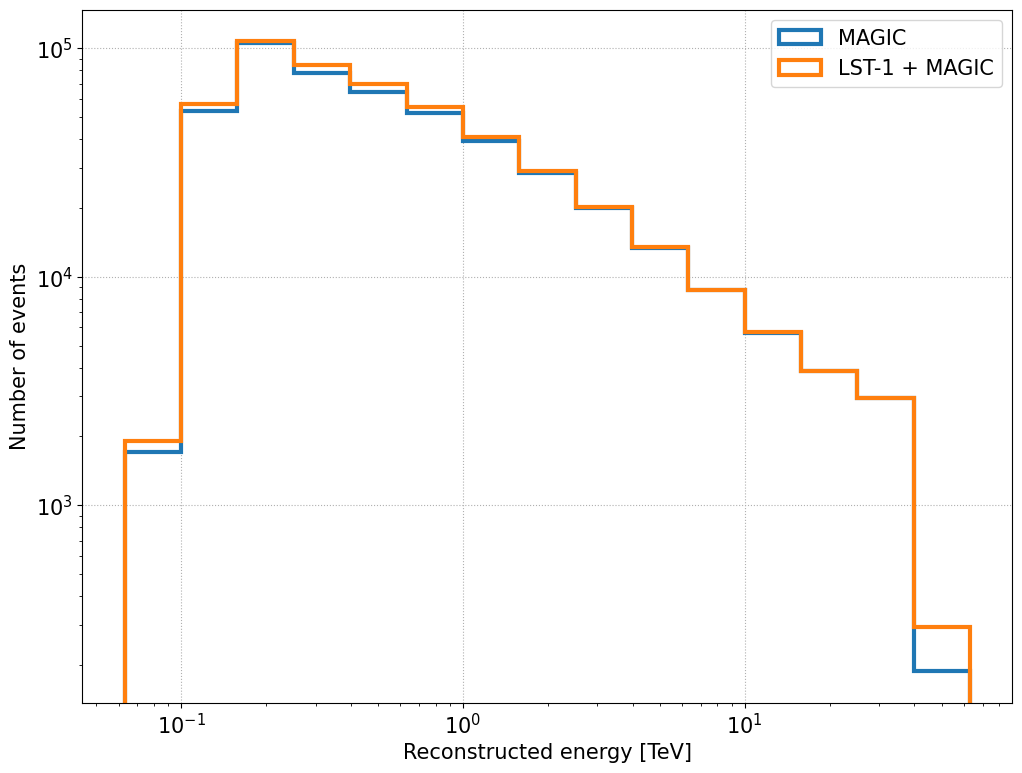

In [5]:
# ================
# === Settings ===
# ================

energy_bins = np.logspace(-2, 2, 21)[4:-1]  # unit: [TeV]
yscale = "log"

# ============
# === Main ===
# ============

print("Energy bins in TeV:")
print(energy_bins)

energy_bins_center = (energy_bins[:-1] + energy_bins[1:]) / 2

energy_bins_width = [
    energy_bins[1:] - energy_bins_center,
    energy_bins_center - energy_bins[:-1],
]

plt.figure()
plt.xlabel("Reconstructed energy [TeV]")
plt.ylabel("Number of events")
plt.semilogx()
plt.yscale(yscale)
plt.grid()

# Plot the MAGIC energy distribution
plt.hist(
    data_magic["reco_energy"].value,
    bins=energy_bins,
    label="MAGIC",
    histtype="step",
    linewidth=3,
)

# Plot the LST-1 + MAGIC energy distribution
plt.hist(
    data_mlst["reco_energy"].value,
    bins=energy_bins,
    label="LST-1 + MAGIC",
    histtype="step",
    linewidth=3,
)

plt.legend()

# Check the gammaness

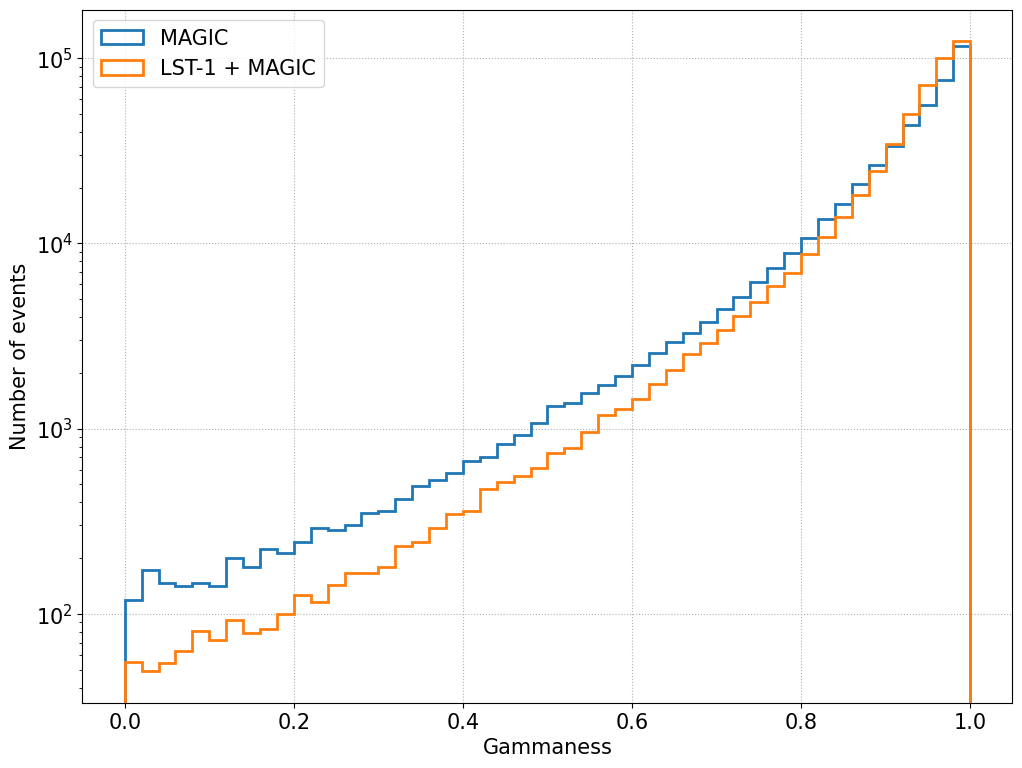

In [6]:
# ================
# === Settings ===
# ================

gh_bins = np.linspace(0, 1, 51)
yscale = "log"

# ============
# === Main ===
# ============

plt.figure()
plt.xlabel("Gammaness")
plt.ylabel("Number of events")
plt.yscale(yscale)
plt.grid()

# Plot the MAGIC gammaness distribution
plt.hist(
    data_magic["gammaness"],
    bins=gh_bins,
    label="MAGIC",
    histtype="step",
    linewidth=2,
)

# Plot the LST-1 + MAGIC gammaness distribution
plt.hist(
    data_mlst["gammaness"],
    bins=gh_bins,
    label="LST-1 + MAGIC",
    histtype="step",
    linewidth=2,
)

plt.legend(loc="upper left")

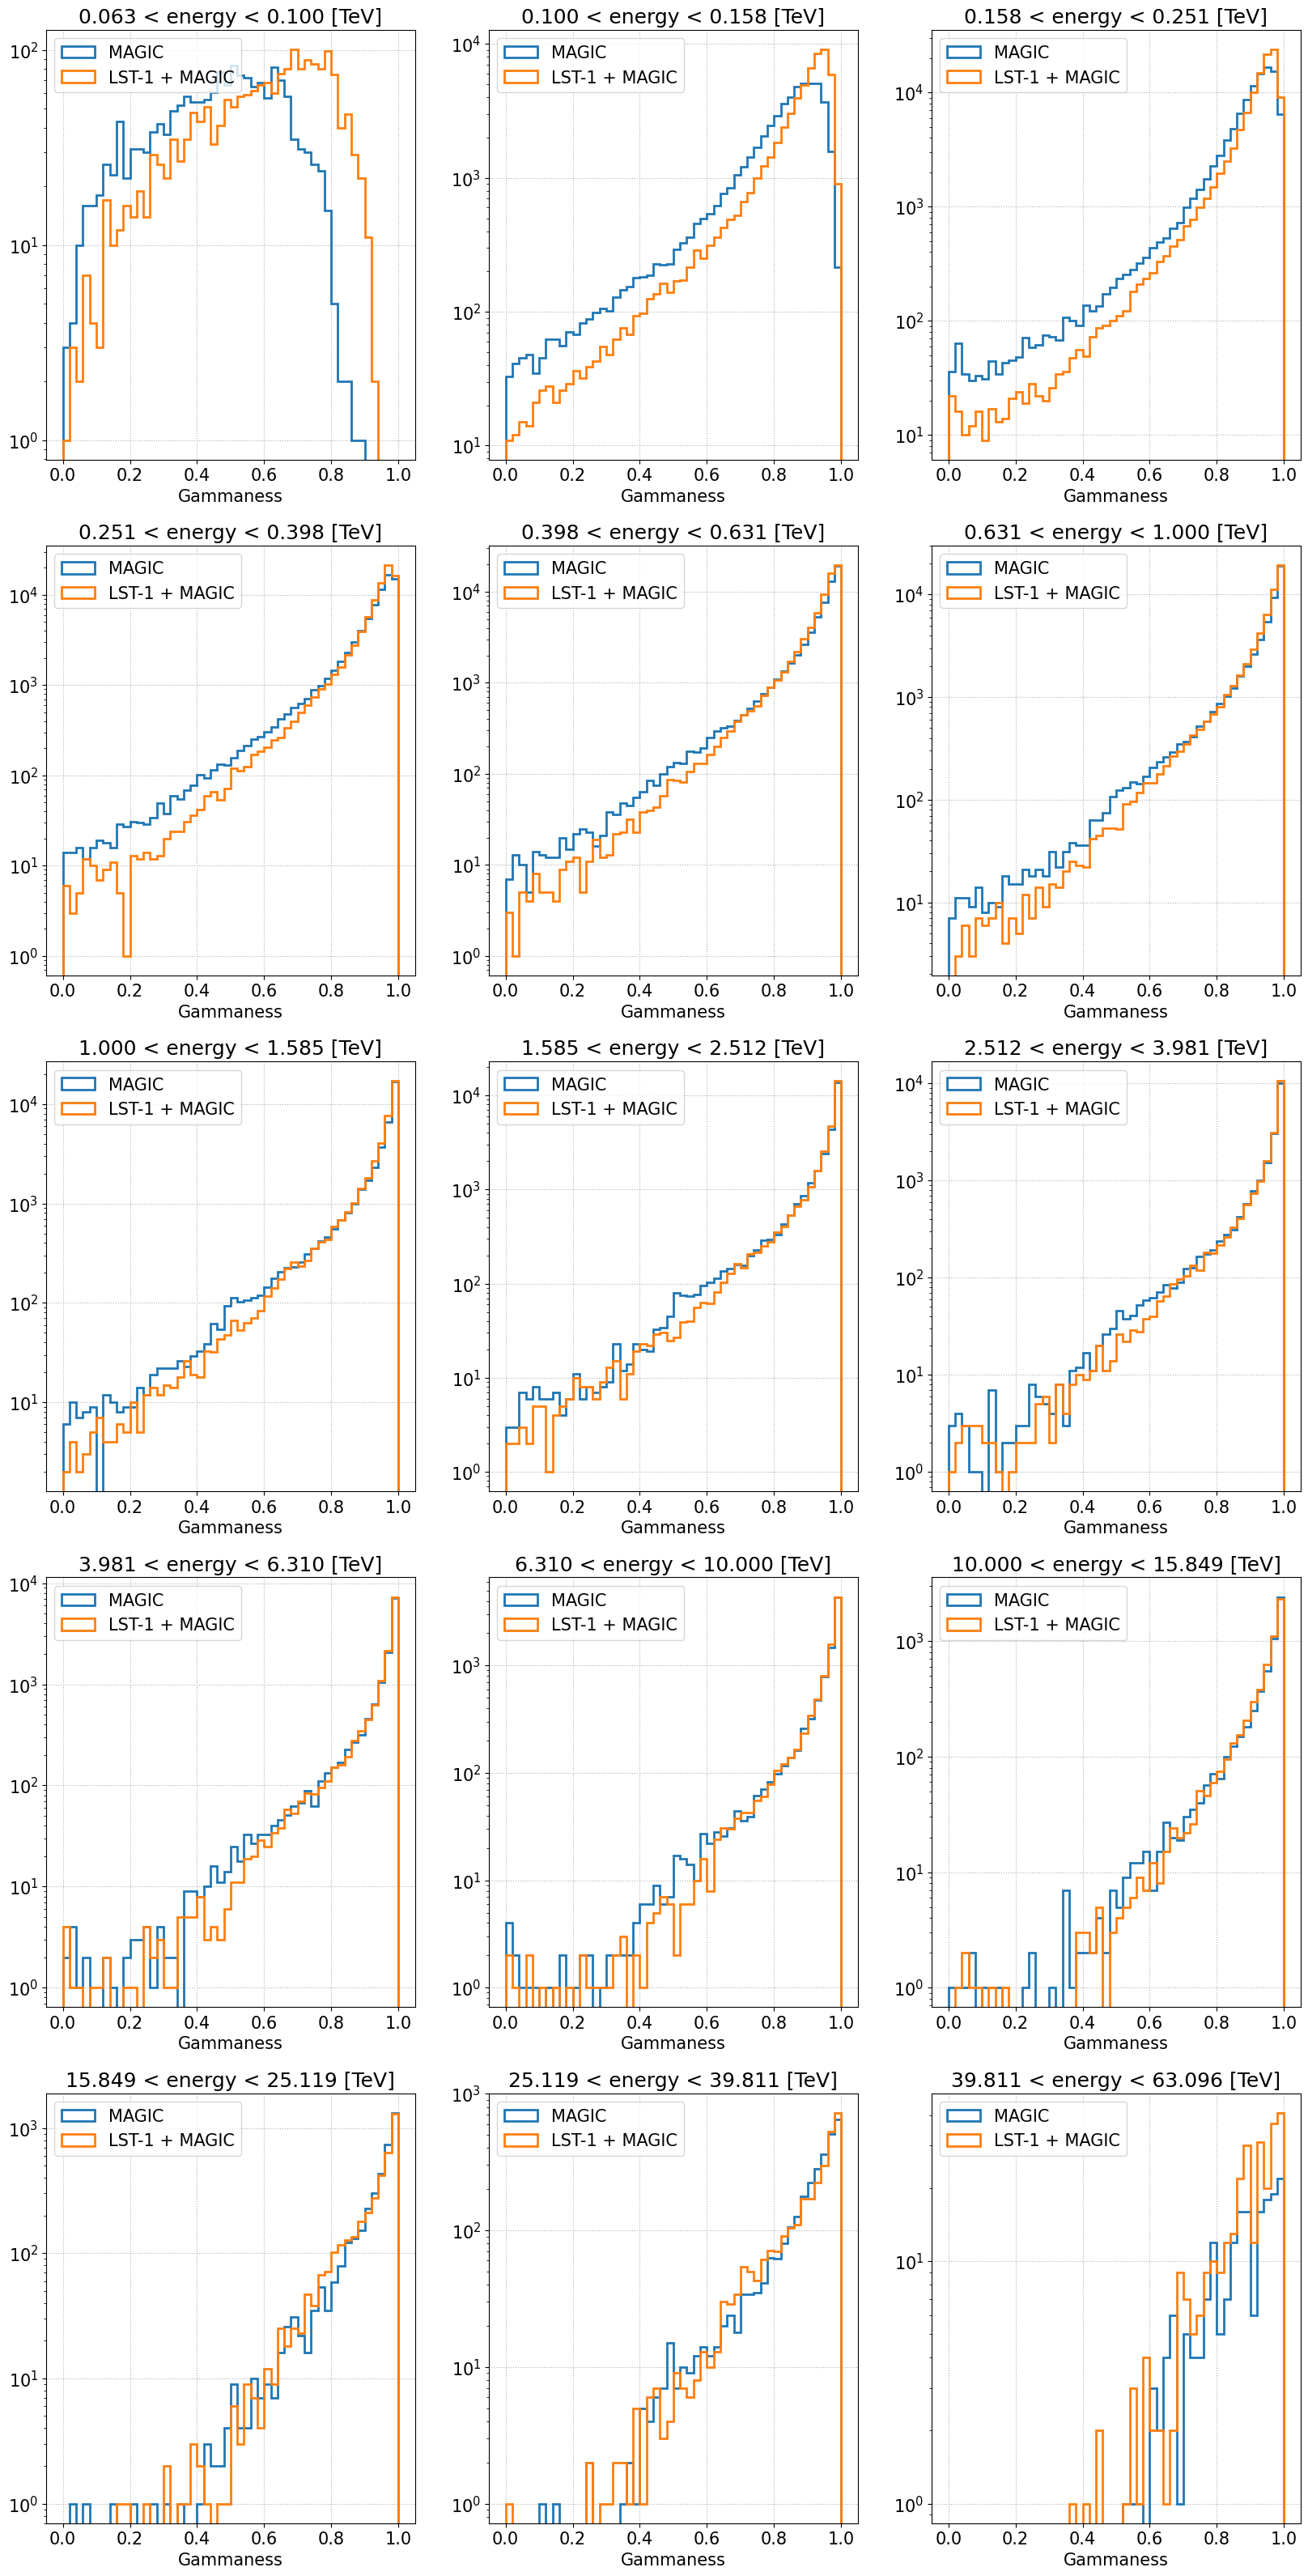

In [7]:
n_columns = 3
n_rows = int(np.ceil(len(energy_bins[:-1]) / n_columns))

grid = (n_rows, n_columns)
locs = list(itertools.product(range(n_rows), range(n_columns)))

plt.figure(figsize=(20, n_rows * 8))

# Loop over every energy bin
for i_bin, (eng_lolim, eng_uplim) in enumerate(zip(energy_bins[:-1], energy_bins[1:])):

    plt.subplot2grid(grid, locs[i_bin])
    plt.title(f"{eng_lolim:.3f} < energy < {eng_uplim:.3f} [TeV]")
    plt.xlabel("Gammaness")
    plt.yscale(yscale)
    plt.grid()

    # Apply the energy cuts
    cond_magic_lolim = data_magic["reco_energy"].value > eng_lolim
    cond_magic_uplim = data_magic["reco_energy"].value < eng_uplim

    cond_mlst_lolim = data_mlst["reco_energy"].value > eng_lolim
    cond_mlst_uplim = data_mlst["reco_energy"].value < eng_uplim

    condition_magic = np.logical_and(cond_magic_lolim, cond_magic_uplim)
    condition_mlst = np.logical_and(cond_mlst_lolim, cond_mlst_uplim)

    dt_magic = data_magic[condition_magic]
    dt_mlst = data_mlst[condition_mlst]

    # Plot the MAGIC gammaness distribution
    if len(dt_magic) > 0:
        plt.hist(
            dt_magic["gammaness"],
            bins=gh_bins,
            label="MAGIC",
            histtype="step",
            linewidth=2,
        )

    # Plot the LST-1 + MAGIC gammaness distribution
    if len(dt_mlst) > 0:
        plt.hist(
            dt_mlst["gammaness"],
            bins=gh_bins,
            label="LST-1 + MAGIC",
            histtype="step",
            linewidth=2,
        )

    plt.legend(loc="upper left")

# Apply dynamic gammaness cuts

In [8]:
# ================
# === Settings ===
# ================

gh_efficiency = 0.9

# ============
# === Main ===
# ============

print(f"Efficiency: {gh_efficiency}")

gh_percentile = 100 * (1 - gh_efficiency)

# Calculate the MAGIC dynamic gammaness cuts
gh_table_magic = calculate_percentile_cut(
    values=data_magic["gammaness"],
    bin_values=data_magic["reco_energy"],
    bins=u.Quantity(energy_bins, unit="TeV"),
    fill_value=0.0,
    percentile=gh_percentile,
)

gh_cuts_magic = gh_table_magic["cut"].value

print("\nMAGIC gammaness cuts:")
print(gh_cuts_magic)

# Calculate the LST-1 + MAGIC dynamic gammaness cuts
gh_table_mlst = calculate_percentile_cut(
    values=data_mlst["gammaness"],
    bin_values=data_mlst["reco_energy"],
    bins=u.Quantity(energy_bins, unit="TeV"),
    fill_value=0.0,
    percentile=gh_percentile,
)

gh_cuts_mlst = gh_table_mlst["cut"].value

print("\nLST-1 + MAGIC gammaness cuts:")
print(gh_cuts_mlst)

Efficiency: 0.9

MAGIC gammaness cuts:
[0.19223194 0.62501667 0.76832619 0.78291667 0.79791667 0.7964131
 0.80075417 0.81733333 0.83201012 0.84783333 0.8525     0.83653869
 0.82785119 0.765875   0.69676786]

LST-1 + MAGIC gammaness cuts:
[0.31533333 0.73140873 0.82049524 0.82850992 0.82811944 0.82434444
 0.82642857 0.84096944 0.85233333 0.86293889 0.86216349 0.8495
 0.80215119 0.73891071 0.7038    ]


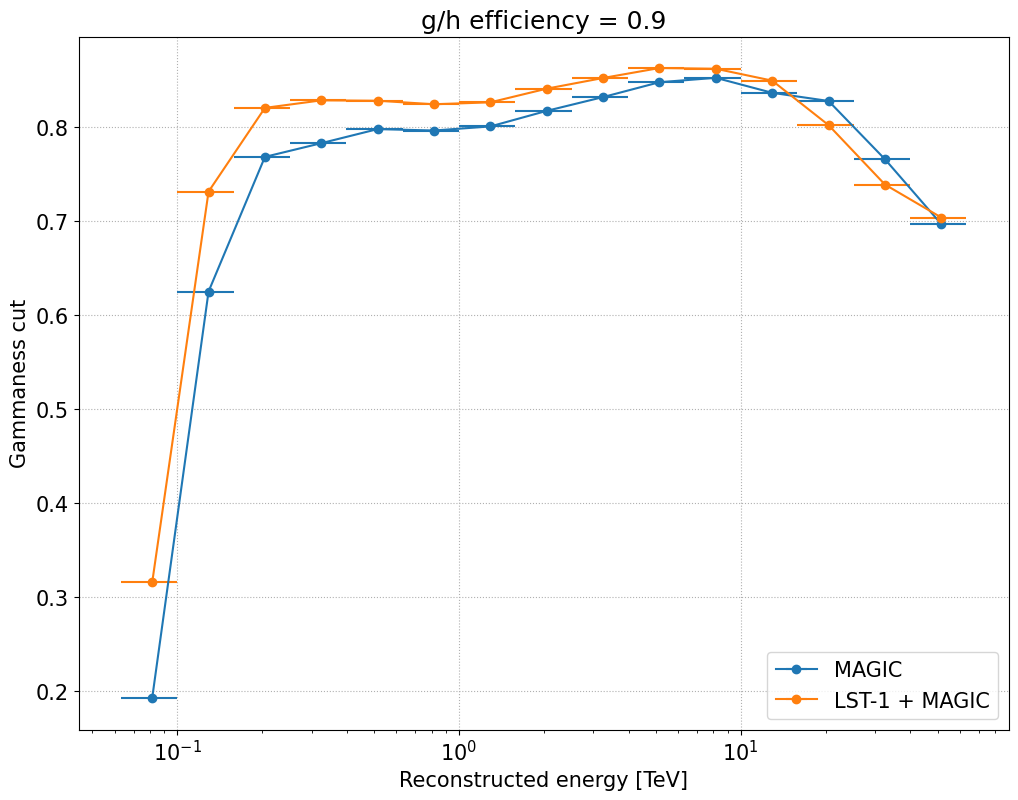

In [9]:
plt.figure()
plt.title(f"g/h efficiency = {gh_efficiency}")
plt.xlabel("Reconstructed energy [TeV]")
plt.ylabel("Gammaness cut")
plt.semilogx()
plt.grid()

# Plot the MAGIC dynamic gammaness cuts
plt.errorbar(
    x=energy_bins_center,
    y=gh_cuts_magic,
    xerr=energy_bins_width,
    label="MAGIC",
    marker="o",
)

# Plot the LST-1 + MAGIC dynamic gammaness cuts
plt.errorbar(
    x=energy_bins_center,
    y=gh_cuts_mlst,
    xerr=energy_bins_width,
    label="LST-1 + MAGIC",
    marker="o",
)

plt.legend(loc="lower right")

In [10]:
# Apply the MAGIC dynamic gammaness cuts
print("Applying the MAGIC gammaness cuts...")

mask_gh_magic = evaluate_binned_cut(
    values=data_magic["gammaness"],
    bin_values=data_magic["reco_energy"],
    cut_table=gh_table_magic,
    op=operator.ge,
)

data_magic_gcut = data_magic[mask_gh_magic]
print(f"--> Number of events: {len(data_magic_gcut)}")

# Apply the LST-1 + MAGIC dynamic gammaness cuts
print("\nApplying the LST-1 + MAGIC gammaness cuts...")

mask_gh_mlst = evaluate_binned_cut(
    values=data_mlst["gammaness"],
    bin_values=data_mlst["reco_energy"],
    cut_table=gh_table_mlst,
    op=operator.ge,
)

data_mlst_gcut = data_mlst[mask_gh_mlst]
print(f"--> Number of events: {len(data_mlst_gcut)}")

Applying the MAGIC gammaness cuts...
--> Number of events: 429479

Applying the LST-1 + MAGIC gammaness cuts...
--> Number of events: 451438


# Check the reconstructed direction

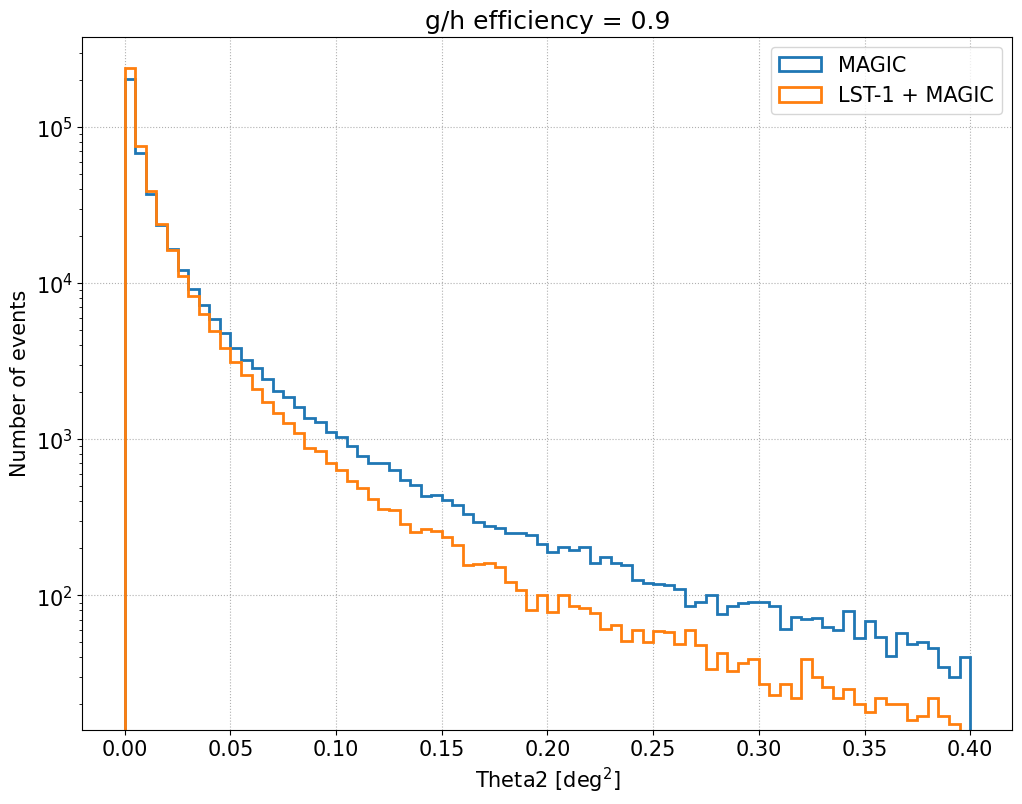

In [11]:
# ================
# === Settings ===
# ================

theta2_bins = np.linspace(0, 0.4, 81)  # unit: [deg2]
yscale = "log"

# ============
# === Main ===
# ============

plt.figure()
plt.title(f"g/h efficiency = {gh_efficiency}")
plt.xlabel("Theta2 [deg$^2$]")
plt.ylabel("Number of events")
plt.yscale(yscale)
plt.grid()

# Plot the MAGIC theta2 distribution
plt.hist(
    np.square(data_magic_gcut["theta"].value),
    bins=theta2_bins,
    label="MAGIC",
    histtype="step",
    linewidth=2,
)

# Plot the LST-1 + MAGIC theta2 distribution
plt.hist(
    np.square(data_mlst_gcut["theta"].value),
    bins=theta2_bins,
    label="LST-1 + MAGIC",
    histtype="step",
    linewidth=2,
)

plt.legend()

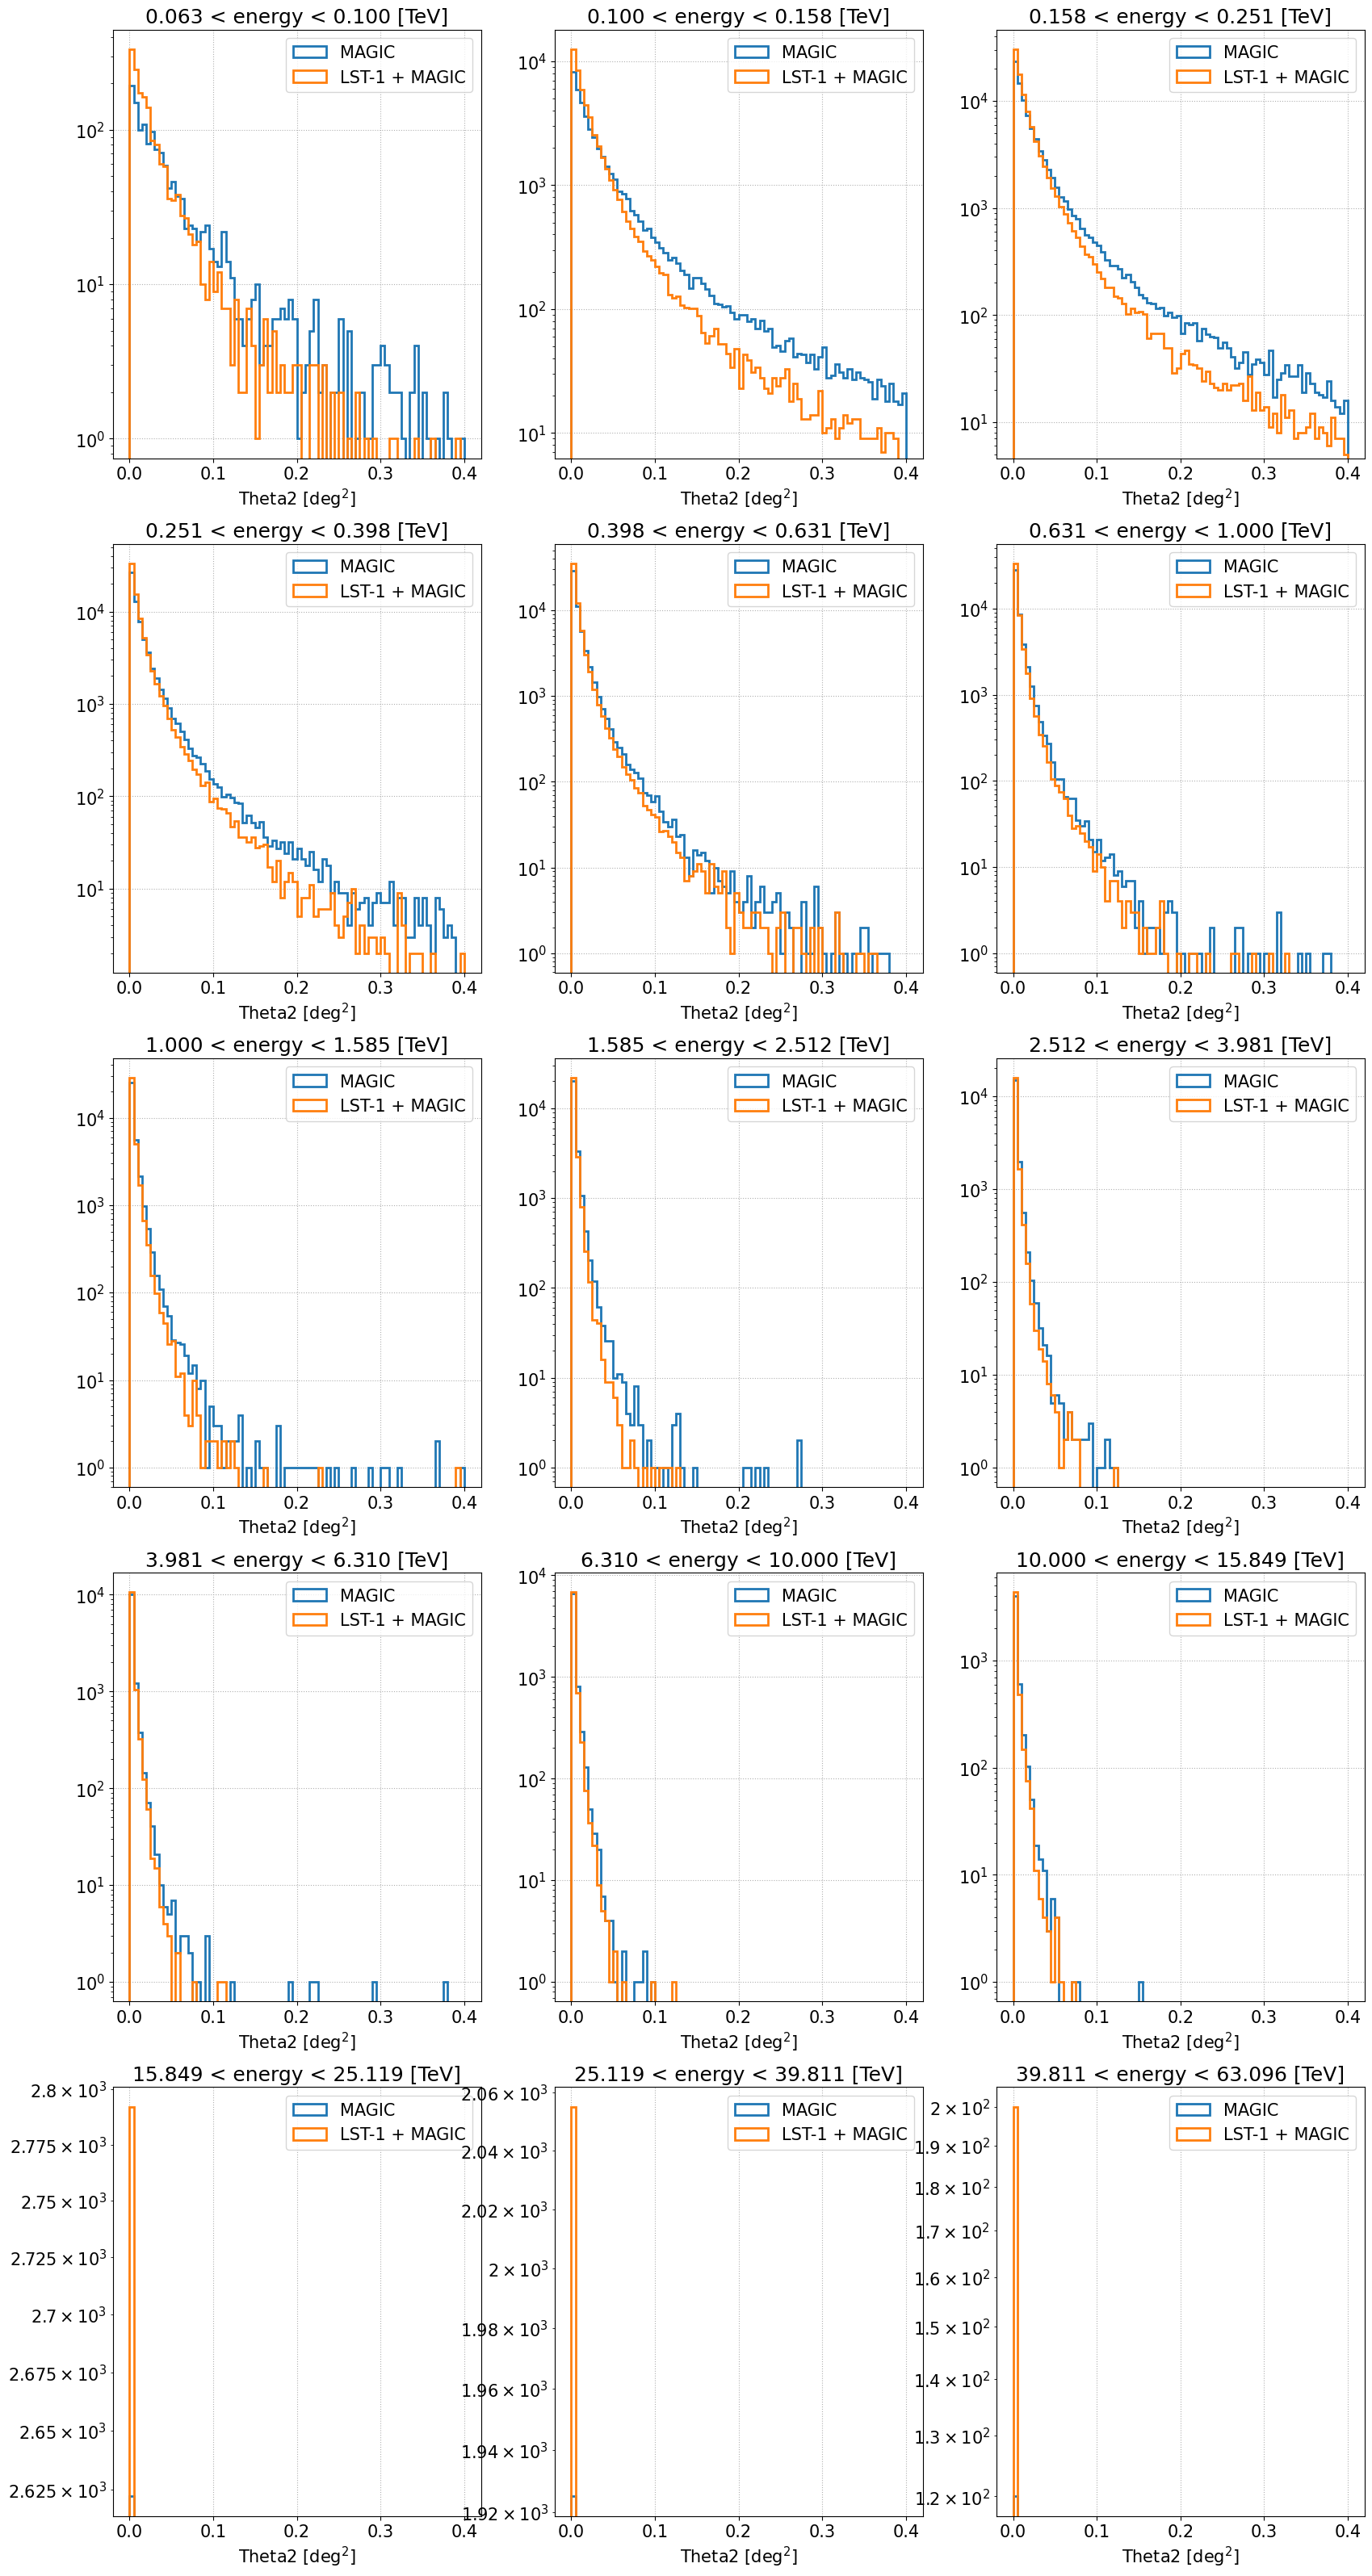

In [12]:
n_columns = 3
n_rows = int(np.ceil(len(energy_bins[:-1]) / n_columns))

grid = (n_rows, n_columns)
locs = list(itertools.product(range(n_rows), range(n_columns)))

plt.figure(figsize=(20, n_rows * 8))

# Loop over every energy bin
for i_bin, (eng_lolim, eng_uplim) in enumerate(zip(energy_bins[:-1], energy_bins[1:])):

    plt.subplot2grid(grid, locs[i_bin])
    plt.title(f"{eng_lolim:.3f} < energy < {eng_uplim:.3f} [TeV]")
    plt.xlabel("Theta2 [deg$^2$]")
    plt.yscale(yscale)
    plt.grid()

    # Apply the energy cuts
    cond_magic_lolim = data_magic_gcut["reco_energy"].value > eng_lolim
    cond_magic_uplim = data_magic_gcut["reco_energy"].value < eng_uplim

    cond_mlst_lolim = data_mlst_gcut["reco_energy"].value > eng_lolim
    cond_mlst_uplim = data_mlst_gcut["reco_energy"].value < eng_uplim

    condition_magic = np.logical_and(cond_magic_lolim, cond_magic_uplim)
    condition_mlst = np.logical_and(cond_mlst_lolim, cond_mlst_uplim)

    dt_magic = data_magic_gcut[condition_magic]
    dt_mlst = data_mlst_gcut[condition_mlst]

    # Plot the MAGIC theta2 distribution
    if len(dt_magic) > 0:
        plt.hist(
            np.square(dt_magic["theta"].value),
            bins=theta2_bins,
            label="MAGIC",
            histtype="step",
            linewidth=2,
        )

    # Plot the LST-1 + MAGIC theta2 distribution
    if len(dt_mlst) > 0:
        plt.hist(
            np.square(dt_mlst["theta"].value),
            bins=theta2_bins,
            label="LST-1 + MAGIC",
            histtype="step",
            linewidth=2,
        )

    plt.legend(loc="upper right")

# Check the angular resolution

In [13]:
# Calculate the MAGIC angular resolution
angres_table_magic = angular_resolution(
    data_magic_gcut, u.Quantity(energy_bins, u.TeV), energy_type="reco"
)

angres_magic = angres_table_magic["angular_resolution"].value

print("MAGIC angular resolution:")
print(angres_magic)

# Calculate the LST-1 + MAGIC angular resolution
angres_table_mlst = angular_resolution(
    data_mlst_gcut, u.Quantity(energy_bins, u.TeV), energy_type="reco"
)

angres_mlst = angres_table_mlst["angular_resolution"].value

print("\nLST-1 + MAGIC angular resolution:")
print(angres_mlst)

# Calculate the relative difference
angres_rel_diff = (angres_mlst - angres_magic) / angres_magic

print("\nRelative difference:")
print(angres_rel_diff)

MAGIC angular resolution:
[0.24328077 0.2119327  0.16875328 0.12538155 0.09774207 0.08126975
 0.06680039 0.0578299  0.05255134 0.05131309 0.05155651 0.05414372
 0.06126971 0.06636643 0.06852228]

LST-1 + MAGIC angular resolution:
[0.17821018 0.15935263 0.13644316 0.10788945 0.08744882 0.07225995
 0.05970736 0.05189805 0.0477845  0.04720216 0.04792961 0.0500465
 0.05664566 0.06078876 0.06374147]

Relative difference:
[-0.26747117 -0.24809795 -0.19146366 -0.13951095 -0.10531031 -0.11086288
 -0.10618238 -0.10257399 -0.09070833 -0.08011456 -0.07034811 -0.0756731
 -0.07547045 -0.08404354 -0.06977011]


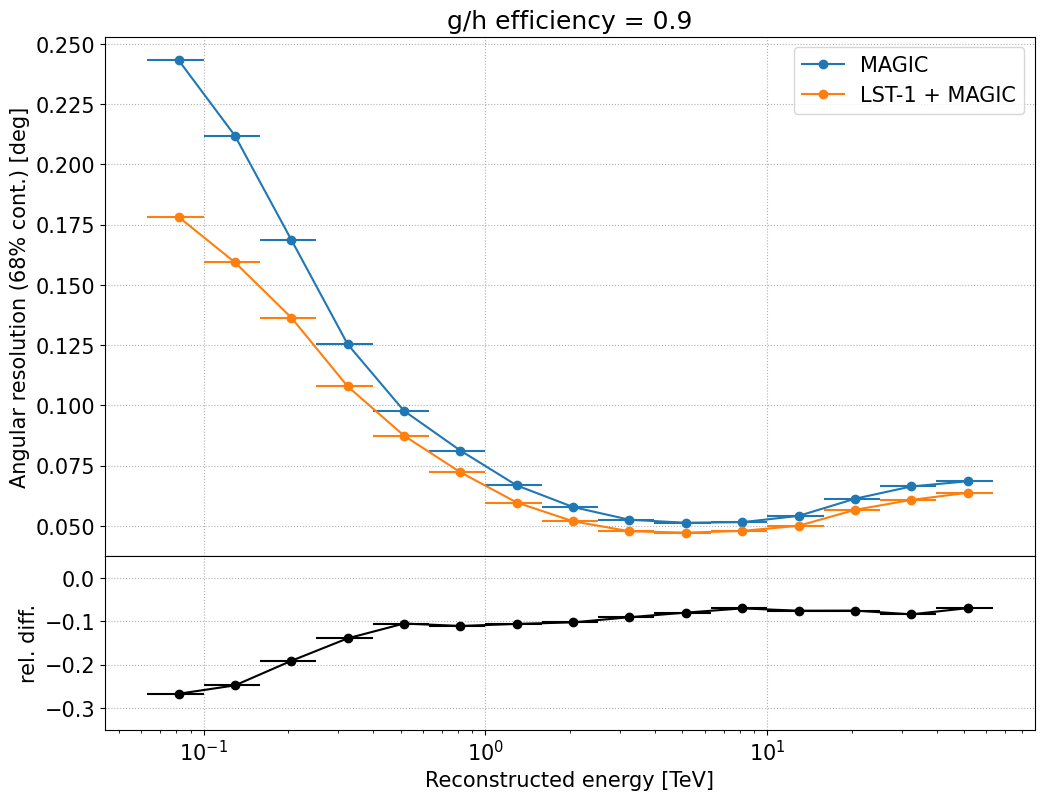

In [14]:
plt.figure()
gs = gridspec.GridSpec(4, 1)

ax1 = plt.subplot(gs[:3])
ax1.set_title(f"g/h efficiency = {gh_efficiency}")
ax1.set_ylabel("Angular resolution (68% cont.) [deg]")
ax1.semilogx()
ax1.grid()

ax2 = plt.subplot(gs[3], sharex=ax1)
ax2.set_xlabel("Reconstructed energy [TeV]")
ax2.set_ylabel("rel. diff.")
ax2.semilogx()
ax2.set_ylim(-0.35, 0.05)
ax2.grid()

plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=0.0)

# Plot the MAGIC angular resolution
ax1.errorbar(
    x=energy_bins_center,
    y=angres_magic,
    xerr=energy_bins_width,
    label="MAGIC",
    marker="o",
)

# Plot the LST-1 + MAGIC angular resolution
ax1.errorbar(
    x=energy_bins_center,
    y=angres_mlst,
    xerr=energy_bins_width,
    label="LST-1 + MAGIC",
    marker="o",
)

# Plot the relative difference
ax2.errorbar(
    x=energy_bins_center,
    y=angres_rel_diff,
    xerr=energy_bins_width,
    marker="o",
    color="black",
)

ax1.legend()

# Apply dynamic theta cuts

In [15]:
# ================
# === Settings ===
# ================

theta_efficiency = 0.75

# ============
# === Main ===
# ============

print(f"Efficiency: {theta_efficiency}")

theta_percentile = 100 * theta_efficiency

# Calculate the MAGIC dynamic theta cuts
theta_table_magic = calculate_percentile_cut(
    values=data_magic_gcut["theta"],
    bin_values=data_magic_gcut["reco_energy"],
    bins=u.Quantity(energy_bins, u.TeV),
    fill_value=data_magic_gcut["theta"].max(),
    percentile=theta_percentile,
)

theta_cuts_magic = theta_table_magic["cut"]

print("\nMAGIC theta cuts:")
print(theta_cuts_magic)

# Calculate the LST-1 + MAGIC dynamic theta cuts
theta_table_mlst = calculate_percentile_cut(
    values=data_mlst_gcut["theta"],
    bin_values=data_mlst_gcut["reco_energy"],
    bins=u.Quantity(energy_bins, u.TeV),
    fill_value=data_mlst_gcut["theta"].max(),
    percentile=theta_percentile,
)

theta_cuts_mlst = theta_table_mlst["cut"]

print("\nLST-1 + MAGIC theta cuts:")
print(theta_cuts_mlst)

Efficiency: 0.75

MAGIC theta cuts:
[0.27909518 0.24426893 0.1942841  0.14368046 0.11136914 0.09255418
 0.07568433 0.06541066 0.05952619 0.05834263 0.05897289 0.0627123
 0.07016219 0.07520395 0.07596091] deg

LST-1 + MAGIC theta cuts:
[0.20071721 0.1804425  0.15453481 0.12216389 0.0994693  0.08208275
 0.0674848  0.05877884 0.05410834 0.05375171 0.05469375 0.05655054
 0.06453413 0.0679802  0.06800507] deg


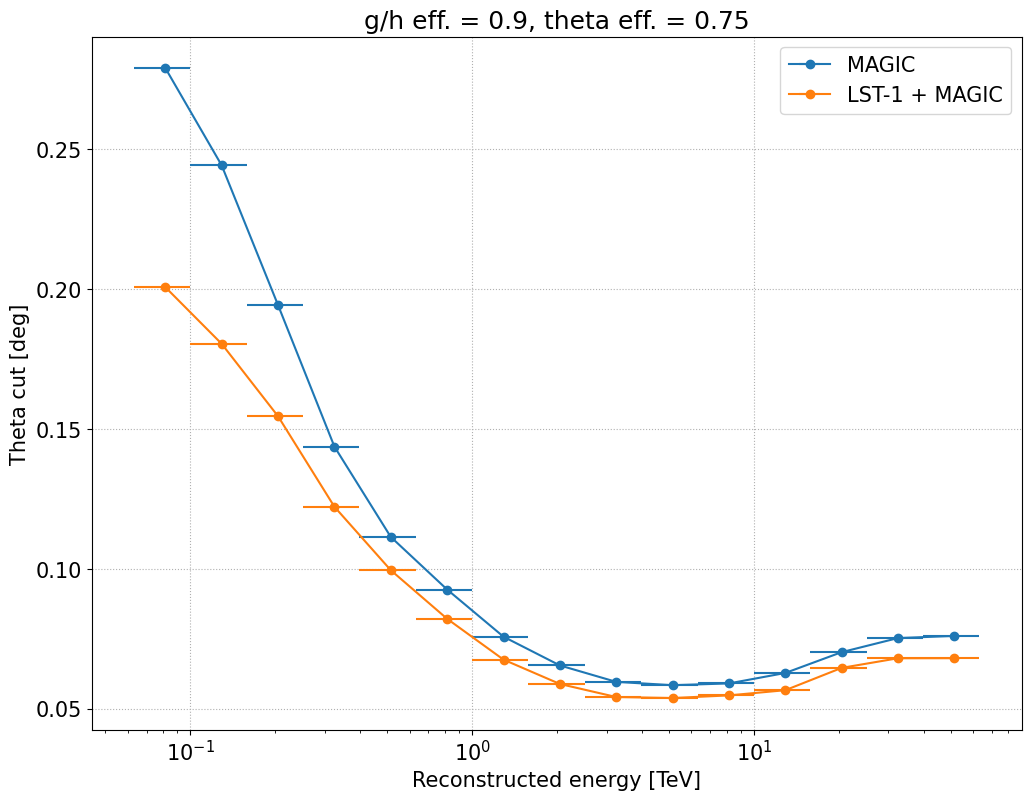

In [16]:
plt.figure()
plt.title(f"g/h eff. = {gh_efficiency}, theta eff. = {theta_efficiency}")
plt.xlabel("Reconstructed energy [TeV]")
plt.ylabel("Theta cut [deg]")
plt.semilogx()
plt.grid()

# Plot the MAGIC dynamic theta cuts
plt.errorbar(
    x=energy_bins_center,
    y=theta_cuts_magic,
    xerr=energy_bins_width,
    label="MAGIC",
    marker="o",
)

# Plot the LST-1 + MAGIC dynamic theta cuts
plt.errorbar(
    x=energy_bins_center,
    y=theta_cuts_mlst,
    xerr=energy_bins_width,
    label="LST-1 + MAGIC",
    marker="o",
)

plt.legend(loc="upper right")

In [17]:
# Apply the MAGIC dynamic theta cuts
print("Applying the MAGIC theta cuts...")

mask_theta_magic = evaluate_binned_cut(
    values=data_magic_gcut["theta"],
    bin_values=data_magic_gcut["reco_energy"],
    cut_table=theta_table_magic,
    op=operator.le,
)

data_magic_gtcuts = data_magic_gcut[mask_theta_magic]
print(f"--> Number of events: {len(data_magic_gtcuts)}")

# Apply the LST-1 + MAGIC dynamic theta cuts
print("\nApplying the LST-1 + MAGIC theta cuts...")

mask_theta_mlst = evaluate_binned_cut(
    values=data_mlst_gcut["theta"],
    bin_values=data_mlst_gcut["reco_energy"],
    cut_table=theta_table_mlst,
    op=operator.le,
)

data_mlst_gtcuts = data_mlst_gcut[mask_theta_mlst]
print(f"--> Number of events: {len(data_mlst_gtcuts)}")

Applying the MAGIC theta cuts...
--> Number of events: 322107

Applying the LST-1 + MAGIC theta cuts...
--> Number of events: 338577


# Check the effective area

In [18]:
# Calculate the MAGIC effective area
aeff_magic = effective_area_per_energy(
    selected_events=data_magic_gtcuts,
    simulation_info=sim_info_magic,
    true_energy_bins=u.Quantity(energy_bins, u.TeV),
)

print("MAGIC effective area:")
print(aeff_magic)

# Calculate the LST-1 + MAGIC effective area
aeff_mlst = effective_area_per_energy(
    selected_events=data_mlst_gtcuts,
    simulation_info=sim_info_mlst,
    true_energy_bins=u.Quantity(energy_bins, u.TeV),
)

print("\nLST-1 + MAGIC effective area:")
print(aeff_mlst)

MAGIC effective area:
[  3251.4142197   19238.23500801  45712.75269612  67875.13209254
  89168.23138952 115462.26254327 138404.56840294 158292.80065963
 174136.16644128 190816.27407668 189606.75192001 199997.15493207
 208671.93705284 219113.43176787 192200.53235518] m2

LST-1 + MAGIC effective area:
[  3198.88889584  20438.42222479  48683.37336712  72412.62745649
  96461.33714459 122209.99433322 143726.24959393 161247.23266213
 176689.06883717 190816.27407668 190509.02742201 200661.08828603
 209643.25716325 224629.75352783 187045.72880542] m2


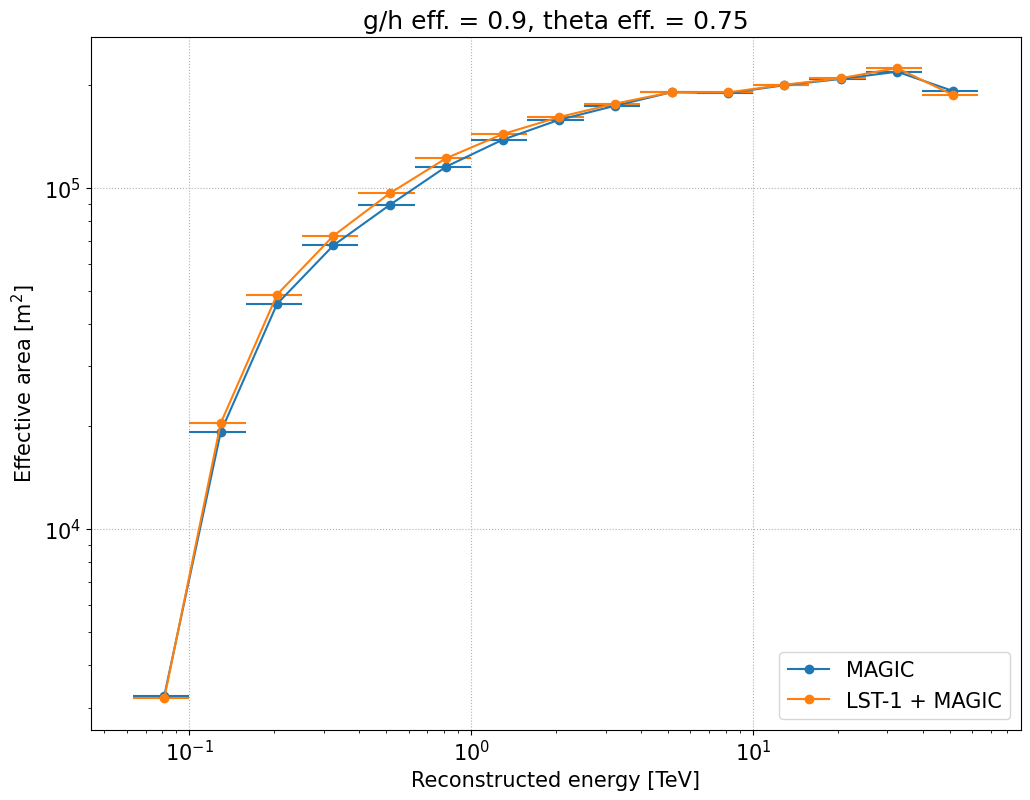

In [19]:
plt.figure()
plt.title(f"g/h eff. = {gh_efficiency}, theta eff. = {theta_efficiency}")
plt.xlabel("Reconstructed energy [TeV]")
plt.ylabel("Effective area [m$^2$]")
plt.loglog()
plt.grid()

# Plot the MAGIC effective area
plt.errorbar(
    x=energy_bins_center,
    y=aeff_magic.value,
    xerr=energy_bins_width,
    label="MAGIC",
    marker="o",
)

# Plot the LST-1 + MAGIC effective area
plt.errorbar(
    x=energy_bins_center,
    y=aeff_mlst.value,
    xerr=energy_bins_width,
    label="LST-1 + MAGIC",
    marker="o",
)

plt.legend(loc="lower right")

# Check the energy bias and resolution

In [20]:
# Calculate the MAGIC energy bias and resolution
engres_table_magic = energy_bias_resolution(
    data_magic_gtcuts, u.Quantity(energy_bins, u.TeV), energy_type="reco"
)

engbias_magic = engres_table_magic["bias"].value
engres_magic = engres_table_magic["resolution"].value

print("MAGIC energy bias:")
print(engbias_magic)

print("\nMAGIC energy resolution:")
print(engres_magic)

# Calculate the LST-1 + MAGIC energy bias and resolution
engres_table_mlst = energy_bias_resolution(
    data_mlst_gtcuts, u.Quantity(energy_bins, u.TeV), energy_type="reco"
)

engbias_mlst = engres_table_mlst["bias"].value
engres_mlst = engres_table_mlst["resolution"].value

print("\nLST-1 + MAGIC energy bias:")
print(engbias_mlst)
    
print("\nLST-1 + MAGIC energy resolution:")
print(engres_mlst)

# Calculate the relative difference of the resolutions
engres_rel_diff = (engres_mlst - engres_magic) / engres_magic

print("\nRelative difference of the resolutions")
print(engres_rel_diff)

MAGIC energy bias:
[ 0.18831436  0.11682577  0.03833635  0.00328948 -0.00788308 -0.00970741
 -0.00893303 -0.01090043 -0.01130354 -0.00760949 -0.00975039 -0.00954214
 -0.00700718 -0.04138319 -0.08736833]

MAGIC energy resolution:
[0.34815029 0.31725587 0.25528724 0.19458932 0.16438495 0.14109922
 0.12499767 0.10913205 0.10678713 0.10169451 0.09982787 0.1068675
 0.12340764 0.12780733 0.06427891]

LST-1 + MAGIC energy bias:
[ 0.23154993  0.13432735  0.03423699  0.00139944 -0.00390515 -0.00603515
 -0.00512857 -0.00644718 -0.00498117 -0.00421915 -0.00396603 -0.00371738
 -0.00175014 -0.03029718 -0.08029732]

LST-1 + MAGIC energy resolution:
[0.29105564 0.25975168 0.19805661 0.15818889 0.13730352 0.11978788
 0.10740586 0.09525375 0.08991587 0.08723873 0.08714711 0.08898962
 0.10048732 0.1083045  0.06725841]

Relative difference of the resolutions
[-0.16399425 -0.18125492 -0.22418131 -0.18706285 -0.16474397 -0.15103797
 -0.1407371  -0.12716974 -0.1579896  -0.1421491  -0.12702618 -0.16729013
 -

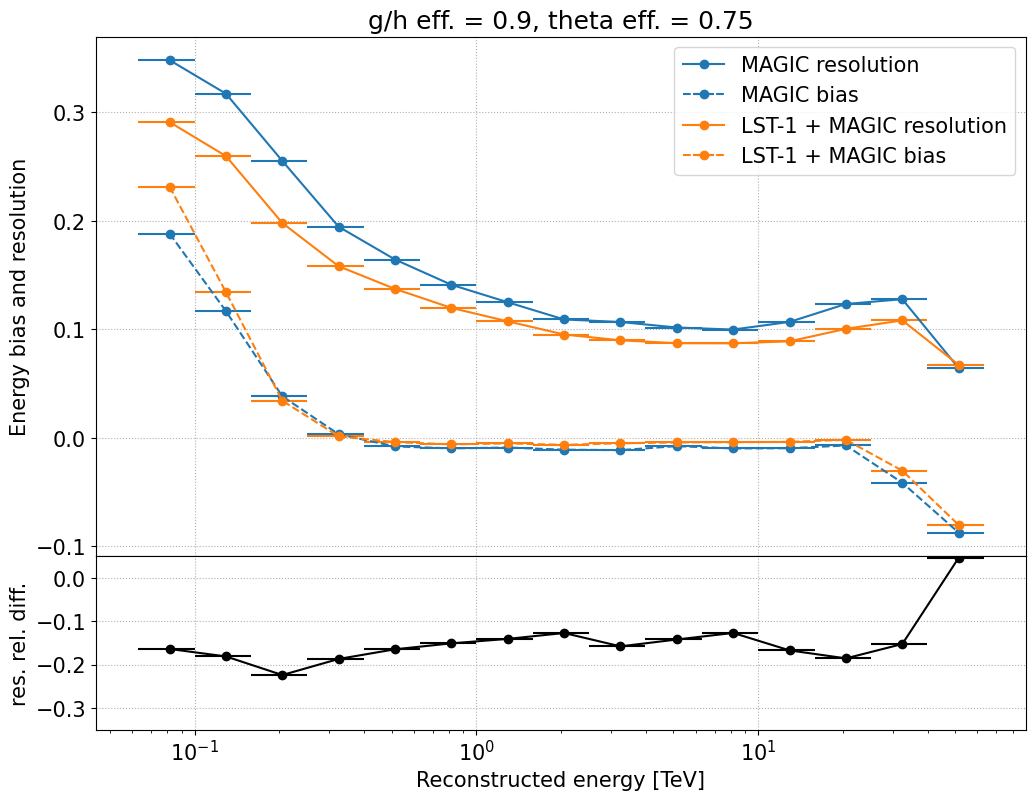

In [21]:
plt.figure()
gs = gridspec.GridSpec(4, 1)

ax1 = plt.subplot(gs[:3])
ax1.set_title(f"g/h eff. = {gh_efficiency}, theta eff. = {theta_efficiency}")
ax1.set_ylabel("Energy bias and resolution")
ax1.semilogx()
ax1.grid()

ax2 = plt.subplot(gs[3], sharex=ax1)
ax2.set_xlabel("Reconstructed energy [TeV]")
ax2.set_ylabel("res. rel. diff.")
ax2.semilogx()
ax2.set_ylim(-0.35, 0.05)
ax2.grid()

plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=0.0)

# Plot the MAGIC energy bias and resolution
ax1.errorbar(
    x=energy_bins_center,
    y=engres_magic,
    xerr=energy_bins_width,
    label="MAGIC resolution",
    marker="o",
    color=colors[0],
)

ax1.errorbar(
    x=energy_bins_center,
    y=engbias_magic,
    xerr=energy_bins_width,
    label="MAGIC bias",
    marker="o",
    linestyle="--",
    color=colors[0],
)

# Plot the MAGIC energy bias and resolution
ax1.errorbar(
    x=energy_bins_center,
    y=engres_mlst,
    xerr=energy_bins_width,
    label="LST-1 + MAGIC resolution",
    marker="o",
    color=colors[1],
)

ax1.errorbar(
    x=energy_bins_center,
    y=engbias_mlst,
    xerr=energy_bins_width,
    label="LST-1 + MAGIC bias",
    marker="o",
    linestyle="--",
    color=colors[1],
)

# Plot the relative difference
ax2.errorbar(
    x=energy_bins_center,
    y=engres_rel_diff,
    xerr=energy_bins_width,
    marker="o",
    color="black",
)

ax1.legend()